In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading datasets...
Fake news dataset shape: (23481, 5)
Real news dataset shape: (21417, 5)
Combined dataset shape: (44898, 2)

Class distribution:
label
1    23481
0    21417
Name: count, dtype: int64
Preprocessing text data...
Shape after preprocessing: (44182, 3)

Example of original vs cleaned text:
Original: 21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative s...
Cleaned: st century wire say ben stein reputable professor pepperdine university also hollywood fame appearing tv show film ferris bueller day made provocative statement judge jeanine pirro show recently discu...
Vocabulary size: 199541
Sequence shape: (44182, 300)

Example of tokenized sequence:
Original text: st century wire say ben stein reputable professor ...
Tokenized sequence: [488, 603, 504, 20, 1646, 2826, 1, 1214, 1, 336, 12, 1289, 6129, 3566, 868]...
Training set: (

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7367 - loss: 0.5028 - val_accuracy: 0.8306 - val_loss: 0.4086
Epoch 2/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8945 - loss: 0.3264 - val_accuracy: 0.8730 - val_loss: 0.3570
Epoch 3/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9000 - loss: 0.2963 - val_accuracy: 0.9802 - val_loss: 0.0797
Epoch 4/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9847 - loss: 0.0649 - val_accuracy: 0.9904 - val_loss: 0.0459
Epoch 5/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9886 - loss: 0.0502 - val_accuracy: 0.9938 - val_loss: 0.0367
Test Accuracy: 0.9941
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4265
           1       0.99      0.99      0.99      4572

    accuracy                           0.99      8837
   macro avg       0.99      0.99      0.99     

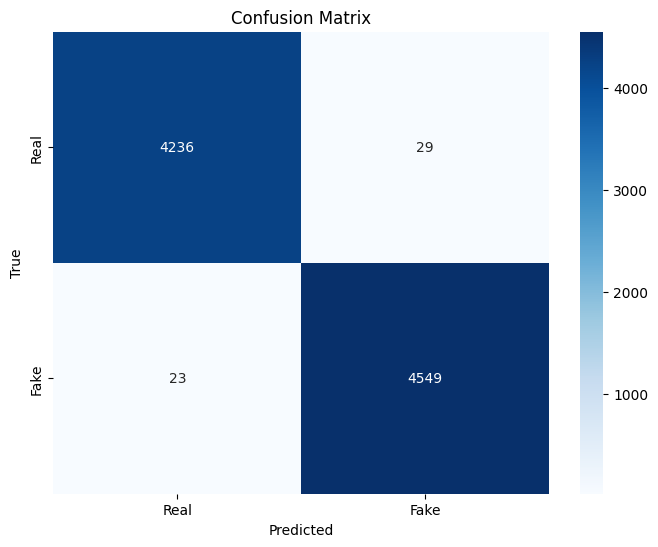

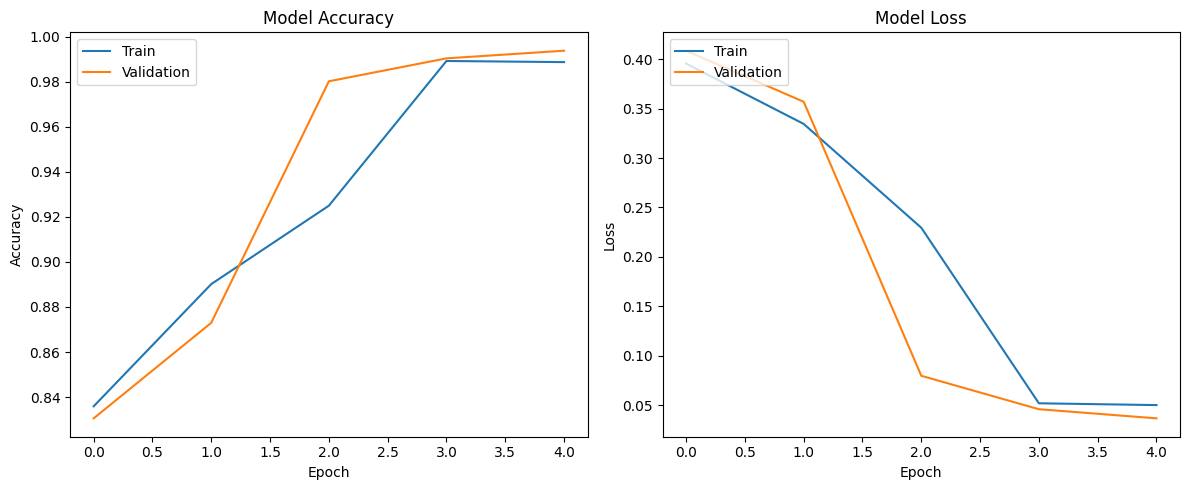


Prediction Examples:

Example 1 (CORRECT):
Text: washington reuters u house representative wednesday passed trillion spending bill fund government september avoid federal agency shutdown saturday existing money...
True label: Real
Predicted: Real

Example 2 (CORRECT):
Text: new york reuters u department homeland security terminated program wednesday allowed minor fleeing violence el salvador guatemala honduras settle united...
True label: Real
Predicted: Real

Example 3 (CORRECT):
Text: brussels reuters european council president donald tusk warned tuesday completing brexit treaty agreeing future relation britain would furious race time...
True label: Real
Predicted: Real

Example 4 (CORRECT):
Text: washington reuters u energy secretary rick perry <OOV> discussed expanding american coal export ukraine energy matter lengthy phone call month...
True label: Real
Predicted: Real

Example 5 (CORRECT):
Text: london reuters parliamentary committee thursday accused british prime minister ther

   - 'reuters': influence score 0.0001
   - 'although': influence score 0.0000
   - 'aimed': influence score 0.0000
   - 'north': influence score 0.0000
   - 'proposal': influence score 0.0000

5. Why Standard (not Bidirectional) LSTM:
   - Efficiency: Uses fewer parameters and less computation
   - Real-time application: Can process text incrementally as it's read
   - Natural flow: Mimics human reading pattern (left-to-right)
   - Sufficient context: Forward context often adequate for fake news detection
   - Interpretability: Easier to analyze which early words influence final classification

Model saved to 'lstm_fake_news_model.h5'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# For deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Step 1: Load and combine the datasets
def load_and_combine_data(fake_path, real_path):
    """Load fake and real news datasets and combine them"""
    # Read the datasets
    print("Loading datasets...")
    fake_df = pd.read_csv(fake_path)
    real_df = pd.read_csv(real_path)

    # Add labels: FAKE = 1, REAL = 0
    fake_df["label"] = 1
    real_df["label"] = 0

    # Display dataset info
    print(f"Fake news dataset shape: {fake_df.shape}")
    print(f"Real news dataset shape: {real_df.shape}")

    # Combine and shuffle
    df = pd.concat([fake_df, real_df], ignore_index=True)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Use only the 'text' and 'label' columns
    df = df[["text", "label"]]

    print(f"Combined dataset shape: {df.shape}")
    print("\nClass distribution:")
    print(df['label'].value_counts())

    return df

# Step 2: Preprocess text
def clean_text(text):
    """Clean and normalize text data"""
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        # Remove stopwords and lemmatize
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    return ""

def preprocess_data(df):
    """Preprocess the dataframe"""
    print("Preprocessing text data...")
    df['cleaned_text'] = df['text'].apply(clean_text)

    # Remove rows with empty text after cleaning
    df = df[df['cleaned_text'].str.len() > 0].reset_index(drop=True)
    print(f"Shape after preprocessing: {df.shape}")

    # Print example of cleaned text
    print("\nExample of original vs cleaned text:")
    print(f"Original: {df['text'].iloc[0][:200]}...")
    print(f"Cleaned: {df['cleaned_text'].iloc[0][:200]}...")

    return df

# Step 3: Tokenize and prepare sequences
def prepare_sequences(df, max_words=10000, max_seq_length=300):
    """Convert text to sequences of integers"""
    # Initialize and fit the tokenizer
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(df['cleaned_text'])

    # Convert text to sequences
    sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

    # Pad sequences to ensure uniform length
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post', truncating='post')

    print(f"Vocabulary size: {len(tokenizer.word_index)}")
    print(f"Sequence shape: {padded_sequences.shape}")

    # Show example of tokenized sequence
    print("\nExample of tokenized sequence:")
    print(f"Original text: {df['cleaned_text'].iloc[0][:50]}...")
    print(f"Tokenized sequence: {sequences[0][:15]}...")

    return padded_sequences, tokenizer

# Step 4: Build the LSTM model
def build_lstm_model(vocab_size, embedding_dim=100, max_seq_length=300):
    """Create a simple LSTM model for fake news detection"""
    model = Sequential([
        # Embedding layer converts word indices to dense vectors
        Embedding(input_dim=vocab_size+1,  # +1 for the 0 padding
                 output_dim=embedding_dim,
                 input_length=max_seq_length),

        # Dropout to prevent overfitting
        Dropout(0.3),

        # LSTM layer with 100 units
        # Note: This is a standard LSTM, not bidirectional
        LSTM(100, return_sequences=False),

        # Dropout after LSTM
        Dropout(0.3),

        # Output layer with sigmoid activation for binary classification
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    print(model.summary())
    return model

# Step 5: Train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=64):
    """Train the model and evaluate its performance"""
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1
    )

    # Evaluate on test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Detailed metrics
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Real', 'Fake'],
                yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    return history, y_pred

# Step 6: Analyze model predictions and explain LSTM behavior
def analyze_predictions(df, X_test, y_test, y_pred, tokenizer, model, max_seq_length=300):
    """Analyze predictions and explain LSTM behavior"""
    # Get random samples from test set where predictions were correct and incorrect
    test_indices = np.random.choice(len(y_test), min(5, len(y_test)), replace=False)

    # Convert test indices to indices in original dataframe
    test_samples = []
    for i in test_indices:
        sample = {
            'text': X_test[i],
            'true_label': y_test[i],
            'predicted': y_pred[i][0],
            'correct': y_test[i] == y_pred[i][0]
        }
        test_samples.append(sample)

    # Print examples
    print("\nPrediction Examples:")
    for i, sample in enumerate(test_samples):
        status = "CORRECT" if sample['correct'] else "INCORRECT"
        print(f"\nExample {i+1} ({status}):")

        # Convert sequence back to words
        words = []
        for idx in sample['text']:
            if idx != 0:  # Skip padding
                for word, index in tokenizer.word_index.items():
                    if index == idx:
                        words.append(word)
                        break

        reconstructed_text = ' '.join(words[:20]) + "..."
        print(f"Text: {reconstructed_text}")
        print(f"True label: {'Fake' if sample['true_label'] == 1 else 'Real'}")
        print(f"Predicted: {'Fake' if sample['predicted'] == 1 else 'Real'}")

    print("\n" + "="*50)
    print("EXPLAINING LSTM BEHAVIOR FOR FAKE NEWS DETECTION:")
    print("="*50)

    # Explain how LSTM processes text for fake news detection
    print("\n1. Sequential Processing in LSTM:")
    print("   - The LSTM processes text word-by-word from left to right")
    print("   - For each word, the model updates its memory based on current input and previous state")
    print("   - This sequential processing mimics how humans read text, building context gradually")

    print("\n2. Memory Mechanism:")
    print("   - Long-term memory (cell state): Retains important information throughout the article")
    print("   - Short-term memory (hidden state): Updated at each word to reflect current context")
    print("   - Gates control information flow: input gate, forget gate, and output gate")

    print("\n3. Key Information LSTM Captures for Fake News Detection:")
    print("   - Language patterns: Sensationalist vs. neutral tone")
    print("   - Contextual inconsistencies: Contradictions within the text")
    print("   - Source reliability patterns: Recognizing writing styles associated with fake news")
    print("   - Emotional manipulation: Excessive emotion often signals fake news")

    # Word importance analysis (simplified)
    print("\n4. Word Importance Analysis:")

    def get_important_words(text_sequence, label):
        """Use a simplified approach to estimate important words for classification"""
        # Convert sequence back to text
        words = []
        for idx in text_sequence:
            if idx != 0:  # Skip padding
                for word, index in tokenizer.word_index.items():
                    if index == idx:
                        words.append(word)
                        break

        # Get baseline prediction
        padded_seq = pad_sequences([text_sequence], maxlen=max_seq_length, padding='post', truncating='post')
        baseline_pred = model.predict(padded_seq)[0][0]

        # Check word importance by removing each word
        word_importance = {}
        for i in range(min(20, len(words))):
            if words[i] in tokenizer.word_index:
                # Create sequence without this word
                modified_seq = text_sequence.copy()
                modified_seq[i] = 0  # Replace with padding
                padded_mod = pad_sequences([modified_seq], maxlen=max_seq_length, padding='post', truncating='post')
                new_pred = model.predict(padded_mod)[0][0]

                # Importance is change in prediction
                importance = abs(baseline_pred - new_pred)
                word_importance[words[i]] = importance

        # Return top 5 words by importance
        sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)
        return sorted_words[:5]

    # Get important words for a fake and real news example
    if np.any(y_test == 0) and np.any(y_test == 1):
        fake_idx = np.where(y_test == 1)[0][0]
        real_idx = np.where(y_test == 0)[0][0]

        print("\n   Important words in FAKE news example:")
        important_fake = get_important_words(X_test[fake_idx], 1)
        for word, score in important_fake:
            print(f"   - '{word}': influence score {score:.4f}")

        print("\n   Important words in REAL news example:")
        important_real = get_important_words(X_test[real_idx], 0)
        for word, score in important_real:
            print(f"   - '{word}': influence score {score:.4f}")

    print("\n5. Why Standard (not Bidirectional) LSTM:")
    print("   - Efficiency: Uses fewer parameters and less computation")
    print("   - Real-time application: Can process text incrementally as it's read")
    print("   - Natural flow: Mimics human reading pattern (left-to-right)")
    print("   - Sufficient context: Forward context often adequate for fake news detection")
    print("   - Interpretability: Easier to analyze which early words influence final classification")

# Main execution
def main(fake_path='Fake.csv', real_path='True.csv'):
    # Step 1: Load and combine data
    df = load_and_combine_data(fake_path, real_path)

    # Step 2: Preprocess data
    df = preprocess_data(df)

    # Step 3: Prepare sequences
    max_words = 10000
    max_seq_length = 300
    X, tokenizer = prepare_sequences(df, max_words, max_seq_length)
    y = df['label'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

    # Step 4: Build model
    vocab_size = min(len(tokenizer.word_index), max_words)
    model = build_lstm_model(vocab_size, embedding_dim=100, max_seq_length=max_seq_length)

    # Step 5: Train and evaluate
    history, y_pred = train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=5)

    # Step 6: Analyze predictions and explain LSTM behavior
    analyze_predictions(df, X_test, y_test, y_pred, tokenizer, model, max_seq_length)

    # Save the model
    model.save('lstm_fake_news_model.h5')
    print("\nModel saved to 'lstm_fake_news_model.h5'")

if __name__ == "__main__":
    # Specify the paths to your datasets
    fake_path = '/content/drive/MyDrive/Colab Notebooks/Fake.csv'
    real_path = '/content/drive/MyDrive/Colab Notebooks/True.csv'
    main(fake_path, real_path)